In [1]:
import numpy as np
import pandas as pd
from FTS import fts_util
from PyEMD import EMD
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
cores = sns.color_palette(n_colors=21)
warnings.filterwarnings('ignore')

## Grid Search DAX stock index time series

In [2]:
ts = pd.read_csv('data/GDAXI.csv', index_col=[0])
ts.head()

file_results = 'out/QE_GS_DAX.csv'
col = 'Close' 

# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ts[col].values)

limite = ts[col].values.shape[0]
limite

182

In [3]:
df_fts = pd.DataFrame(ts[col].copy())
df_fts[col] = ts.values
df_fts.head()


col_imf = '2_3_residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

In [4]:
from FTS.Models.MV_Lee import STFMV_Convencional_Lee
model = STFMV_Convencional_Lee()

In [5]:
%time
for k in range(2, limite):
    # run model
    model.fit(X=df_fts[[col, col_imf]].values, k=k)
    mape, mae, mse, rmse, dtw = model.predict(plot=False, SM=False)
    
    # verify and save 
    experimento = {'IMF':col_imf, 'amount':k, 'MAPE':mape, 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'DTW':dtw}
    fts_util.update_values_exp(experimento, key_words=['IMF','amount', 'MSE'], fp=file_results, log=False)

CPU times: user 2 µs, sys: 5 µs, total: 7 µs
Wall time: 4.29 µs


In [6]:
df_view = pd.read_csv(file_results, index_col=['amount'])
df_view

,IMF,MAPE,MAE,MSE,RMSE,DTW
amount,,,,,,
2,2_3_residue,21.13,679.88,734390.12,856.97,122934.275327
3,2_3_residue,15.92,495.29,359922.74,599.94,85751.861642
4,2_3_residue,12.21,361.88,197681.69,444.61,63525.538799
5,2_3_residue,9.61,303.92,145007.89,380.80,52325.844705
6,2_3_residue,6.86,246.63,110692.96,332.71,42872.360883
...,...,...,...,...,...,...
177,2_3_residue,0.12,3.41,526.03,22.94,616.814856
178,2_3_residue,0.17,4.35,663.72,25.76,654.374797
179,2_3_residue,0.12,3.20,535.37,23.14,576.237360


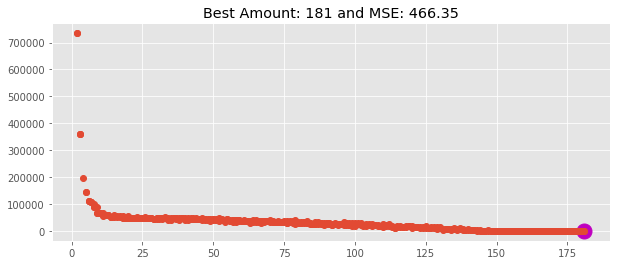

In [7]:
best = fts_util.best_GS(df_view, 'MSE')

plt.figure(figsize=(10,4))
plt.plot(best.index.values[0], best['MSE'].values[0], '-mo', markersize=15)
plt.title('Best Amount: {} and MSE: {}'.format(best.index.values[0], best['MSE'].values[0]))
plt.plot(df_view['MSE'], 'o')
# for i in range(df_view.shape[0]):
#     plt.annotate(df_view.index[i], (df_view.index[i], df_view['MSE'].iloc[i]))
plt.show()